In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 


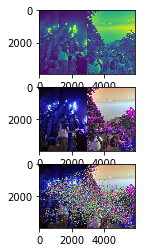

In [4]:
imgname1 = 'test3.jpg'
imgname2 = 'test5.jpg'

sift = cv2.xfeatures2d.SIFT_create()

img1 = cv2.imread(imgname1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) #灰度处理图像
kp1, des1 = sift.detectAndCompute(img1,None)   #des是描述子

img2 = cv2.imread(imgname2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)#灰度处理图像
kp2, des2 = sift.detectAndCompute(img2,None)  #des是描述子

hmerge = np.hstack((gray1, gray2)) #水平拼接
plt.subplot(3, 1, 1)
plt.imshow(hmerge)
#cv2.imshow("gray", hmerge) #拼接显示为gray
#cv2.waitKey(0)

img3 = cv2.drawKeypoints(img1,kp1,img1,color=(255,0,255)) #画出特征点，并显示为红色圆圈
img4 = cv2.drawKeypoints(img2,kp2,img2,color=(255,0,255)) #画出特征点，并显示为红色圆圈
hmerge = np.hstack((img3, img4)) #水平拼接
plt.subplot(3, 1, 2)
plt.imshow(hmerge)
#cv2.imshow("point", hmerge) #拼接显示为gray
#cv2.waitKey(0)
# BFMatcher解决匹配
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# 调整ratio
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img5 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=2)
#cv2.imshow("BFmatch", img5)
plt.subplot(3, 1, 3)
plt.imshow(img5)